# Task:1

## Table Booking and Online Delivery

*Determine the percentage of restaurants that offer table booking and online delivery.

*Compare the average ratings of restaurantswith table booking and those without.

*Analyze the availability of online deliveryamong restaurants with different price ranges.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv("Dataset.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## 1.Determine the percentage of restaurants that offer table booking and online delivery.

In [3]:
total_number_of_restaurants = df["Restaurant ID"].nunique()
print("Total number of Restaurant:", total_number_of_restaurants)

Total number of Restaurant: 9551


In [4]:
df.shape[0]

9551

In [5]:
df["Has Table booking"].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

only two unique values

In [6]:
df["Has Online delivery"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

only two unique values

In [7]:
table_booking = sum(df["Has Table booking"] == "Yes")/ total_number_of_restaurants *100
table=round(table_booking,2)
print(f"The percentage of restaurants that offer Table booking: {table}%")

online_delivery = sum(df["Has Online delivery"] == "Yes")/ total_number_of_restaurants *100
table=round(online_delivery,2)
print(f"\nThe percentage of restaurants that offer Online Delivery: {table}%")

The percentage of restaurants that offer Table booking: 12.12%

The percentage of restaurants that offer Online Delivery: 25.66%


## 2.Compare the average ratings of restaurants with table booking and those without.

In [8]:
avg_rating= df.groupby('Has Table booking')['Aggregate rating'].mean()


if 'Yes' in avg_rating.index and 'No' in avg_rating.index:
    avg_rating_with_booking = avg_rating.loc['Yes']
    avg_rating_without_booking = avg_rating.loc['No']
    print(f"Average Rating of Restaurant with Table Booking : {avg_rating_with_booking:.2f}")
    print(f"\nAverage Rating of Restaurant without Table Booking : {avg_rating_without_booking:.2f}")
  

Average Rating of Restaurant with Table Booking : 3.44

Average Rating of Restaurant without Table Booking : 2.56


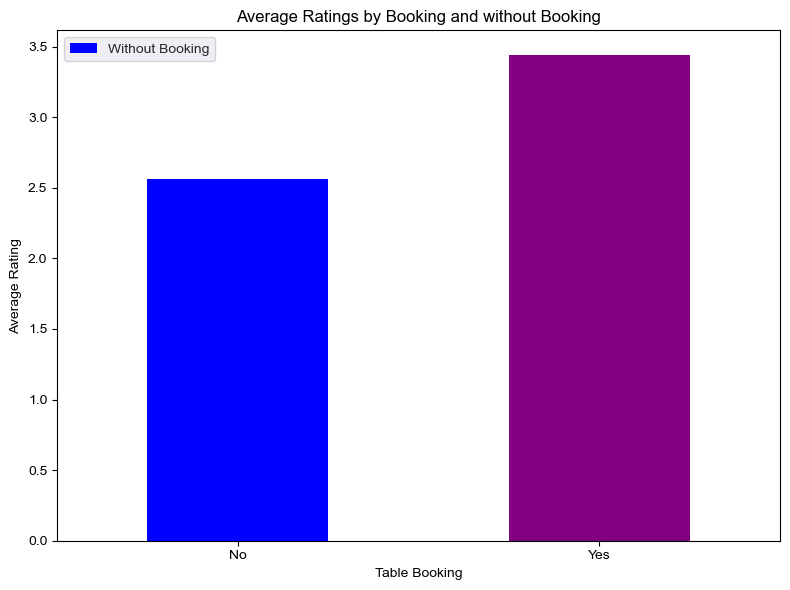

In [9]:
plt.figure(figsize=(8, 6))
avg_rating.plot(kind='bar', color=['blue', 'purple'])
sns.set_style("darkgrid")
plt.title("Average Ratings by Booking and without Booking")
plt.xlabel("Table Booking")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.legend(["Without Booking", "With Booking"])
plt.tight_layout()
plt.show()


## 3.Analyze the availability of online delivery among restaurants with different price ranges

In [10]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

There are 4 unique values is present in the Price range

In [11]:
df["Has Online delivery"].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

only two unique values

Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
dtype: float64


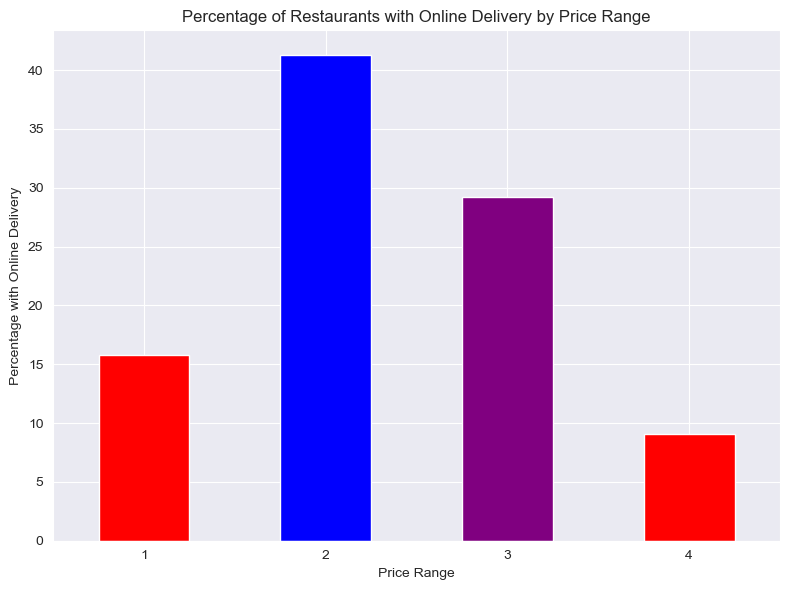

In [12]:
online_delivery_df = df[df['Has Online delivery'] == 'Yes']
online_delivery_by_price = (online_delivery_df.groupby('Price range').size() / df.groupby('Price range').size()) * 100
print(online_delivery_by_price)

plt.figure(figsize=(8, 6))
online_delivery_by_price.plot(kind='bar', color=['red', 'blue', 'purple'])
sns.set_style("darkgrid")
plt.title("Percentage of Restaurants with Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage with Online Delivery")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Price range
1     701
2    1286
3     411
4      53
dtype: int64


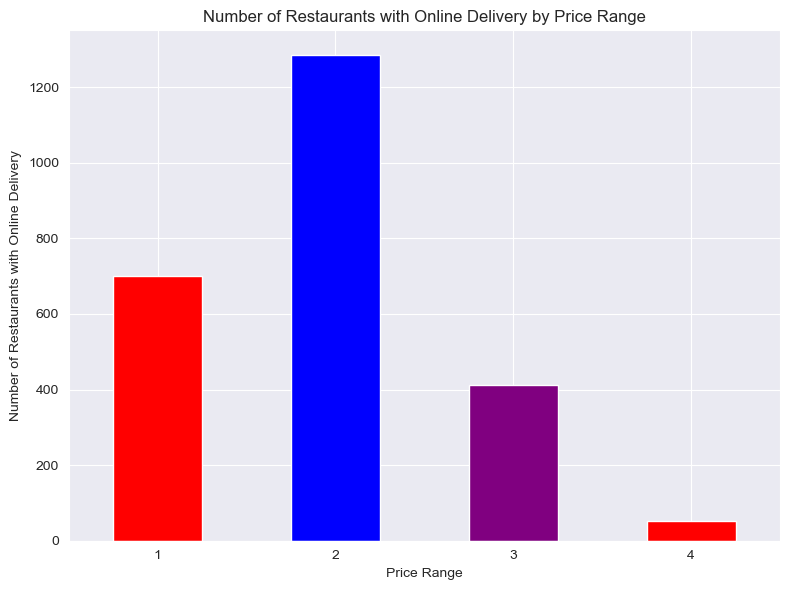

In [13]:
online_delivery= df[df['Has Online delivery'] == 'Yes']
count_delivery = online_delivery.groupby('Price range').size()

print(count_delivery)

plt.figure(figsize=(8, 6))
count_delivery.plot(kind='bar', color=['Red',"Blue", "purple"])
sns.set_style("darkgrid")
plt.title("Number of Restaurants with Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants with Online Delivery")
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()


price range "2" has more online delivery support. and "4" has online support.

# TASK:2

## Price Range Analysis

1.Determine the most common price range among all the restaurants.

2.Calculate the average rating for each price range.

3.Identify the color that represents the highest average rating among different price ranges

## 1.Determine the most common price range among all the restaurants.

The most common price range is: 1


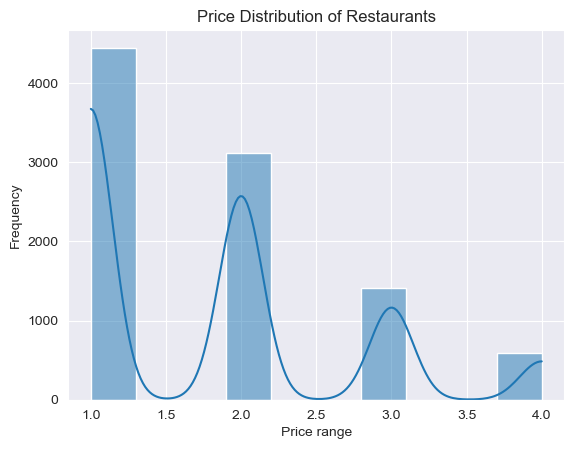

In [14]:
most_common_price= df["Price range"].mode()[0]
print(f"The most common price range is: {most_common_price}")

sns.histplot(data=df, x='Price range', bins=10, kde=True)
sns.set_style("darkgrid")
plt.xlabel("Price range")
plt.ylabel("Frequency")
plt.title("Price Distribution of Restaurants")
plt.show()


#### The most common price range is: 1

## 2.Calculate the average rating for each price range.

In [15]:
average_rating = df.groupby('Price range')['Aggregate rating'].mean()

average_ratings_table = pd.DataFrame(average_rating, columns=['Aggregate rating'])

print(average_ratings_table)


             Aggregate rating
Price range                  
1                    1.999887
2                    2.941054
3                    3.683381
4                    3.817918


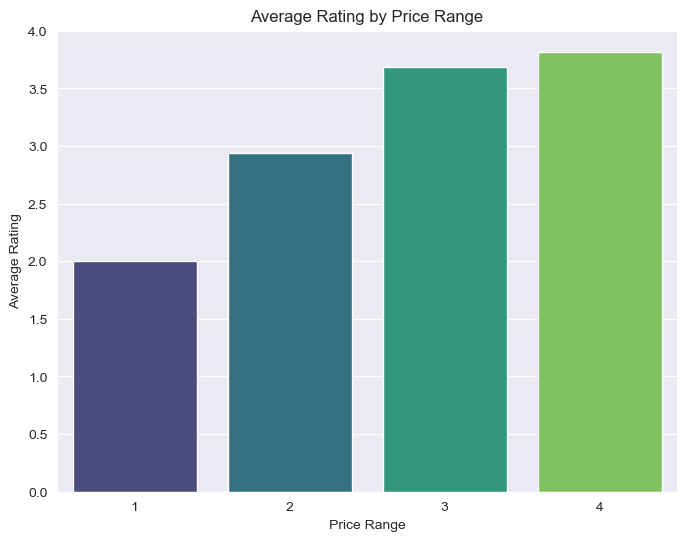

In [16]:
average_rating = df.groupby('Price range')['Aggregate rating'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_rating.index, y=average_rating.values, palette='viridis')
sns.set_style("darkgrid")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating by Price Range")
plt.show()

## 3.Identify the color that represents the highest average rating among different price ranges

In [17]:
average_rating = df.groupby('Price range')['Aggregate rating'].mean()

highest_avg_rating= average_rating.idxmax()
highest_color=df[df['Price range'] == highest_avg_rating]["Rating color"].iloc[0]
highest_color

'Green'

"Green" is the  color that represents the highest average rating among different price ranges

# TASK:3

## Feature Engineering

1.Extract additional features from the existingcolumns, such as the length of the restaurantname or address.

2.Create new features like "Has Table Booking"or "Has Online Delivery" by encodingcategorical variables.

In [18]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


## 1.Extract additional features from the existingcolumns, such as the length of the restaurant name or address.

In [19]:
lenght_of_restaurtant_name=df["Restaurant Name"].apply(len)
print("Lenght_of Restaurtant_name\n\n",lenght_of_restaurtant_name)

Lenght_of Restaurtant_name

 0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: Restaurant Name, Length: 9551, dtype: int64


In [20]:
lenght_of_restaurtant_Address=df["Address"].apply(len)
print("Lenght_of Restaurtant_Address\n\n",lenght_of_restaurtant_Address)

Lenght_of Restaurtant_Address

 0        71
1        67
2        56
3        70
4        64
       ... 
9546    103
9547     77
9548     73
9549     75
9550     65
Name: Address, Length: 9551, dtype: int64


### Length of Restaurtant name is "9551" and Address is also "9551"

## 2.Create new features like "Has Table Booking"or "Has Online Delivery" by encoding categorical variables.

In [21]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [22]:
df.shape

(9551, 21)

In [23]:
df["Has Table Booking"] = df["Has Table booking"].map({"Yes":1 , "No":0})
df["Has Online Delivery"] = df["Has Online delivery"].map({"Yes":1 , "No":0})

In [24]:
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,1,0


In [25]:
df.shape

(9551, 23)

#### at the end of dataset column new features created

# Project overview

**The price range analysis revealed that most restaurants fell within a mid-range pricing category, while those with the highest average rating tended to be in the higher price range.

*These insights uncovered opportunities to maximize revenue while maintaining competitive pricing structures.

**Furthermore, incorporating feature engineering techniques enriches the dataset by introducing key predictors that can lead to more accurate predictive models. This enhancement will improve the performance and interpretability of the predictive models developed from the data.